<a href="https://colab.research.google.com/github/TarieGumbo/BP_Public-/blob/main/stocks_daily_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Return of Stock Data

## Daily Return formula

Visiting a financial website that provides stock price information. Type a company’s name or its stock’s ticker symbol.  We will use the utility *curl* to download the data, but we need a URL.  To find the URL, navigate to Yahoo finance, type in NAB.AX, click the 'Historical' tab.  towards the right is a download option.  right click on the download link and select 'Copy Link Address' form the popup menu.  No paste to the URL assignment statement.

Find in the historical prices section the stock’s closing price for any two consecutive days. For example, assume a stock’s closing price was \$36.75 yesterday and that its closing price was \$35.50 the previous day. Subtract the previous day’s closing price from the most recent day’s closing price. In this example, subtract \$35.50 from \$36.75 to get \$1.25.

Now divide the results by the previous day's closing prices to calculate the daily return.  Multiply this by 100 to convert to a percentage.  So $1.25 divided by #35.50 equals 0.035.  Multiply 0.035 by 100 to 3.5 percent.

    Daily return = (Today prices - Yesterday price) / Yesterday price

We will look at three different methods in Python to process the file:
* Use read() and readline() functions
* Use CSV module
* Use Pandas


In [1]:
!curl "https://query1.finance.yahoo.com/v7/finance/download/NAB.AX?period1=1623137733&period2=1654673733&interval=1d&events=history&includeAdjustedClose=true" > stocks.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17578    0 17578    0     0  92031      0 --:--:-- --:--:-- --:--:-- 92031


## Read CSV file

[['2021-06-08', '26.600000', '26.870001', '26.590000', '26.770000', '25.568409', '5908234'], ['2021-06-09', '26.670000', '26.850000', '26.530001', '26.559999', '25.367834', '5544022'], ['2021-06-10', '26.639999', '26.709999', '26.490000', '26.620001', '25.425142', '4341415'], ['2021-06-11', '26.400000', '26.500000', '26.290001', '26.459999', '25.272324', '3954712'], ['2021-06-15', '26.520000', '26.799999', '26.500000', '26.670000', '25.472897', '4585455'], ['2021-06-16', '26.860001', '26.969999', '26.760000', '26.860001', '25.654369', '5997252'], ['2021-06-17', '27.000000', '27.129999', '26.840000', '27.010000', '25.797636', '8809400'], ['2021-06-18', '26.780001', '26.990000', '26.770000', '26.870001', '25.663921', '9945270'], ['2021-06-21', '26.260000', '26.420000', '26.120001', '26.420000', '25.234119', '6012455'], ['2021-06-22', '26.870001', '26.930000', '26.580000', '26.730000', '25.530205', '5285365'], ['2021-06-23', '26.530001', '26.639999', '26.299999', '26.370001', '25.186363',

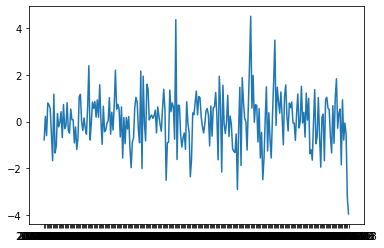

In [2]:
#Calculate the return, use 'Adj Close', or column 6 (index 5)
ADJ_CLOSE = 5 #Constant used for readability 
DATE = 0 #Date is in Column 1, index 0 

daily_return_percentage = [] # list to store calculations 
dates = [] #will parallel the daily_return_percentage

#get the data 
with open ('stocks.csv', 'r') as f : 
    fields = f.readline().split(',')
    data = f.read()

#transverse over each row 
stocks = [] #could use  dictionary, with date as key 
for row in data.split("\n"): 
  fields = row.split(',')
  stocks.append(fields)

print(stocks)  

#process each row 
yesterdays_price = float(stocks[0][ADJ_CLOSE])
for day in stocks[1:]: #starting from second element! 
  todays_price = float(day[ADJ_CLOSE])
  daily_return = ((todays_price- yesterdays_price)/ yesterdays_price) * 100
  daily_return_percentage.append(daily_return)
  dates.append(day[DATE])
  yesterdays_price = todays_price #about to move to next day, current becomes present 

#plot the results 
from matplotlib import pyplot as plt 
plt.plot(dates, daily_return_percentage)




## Module: CSV

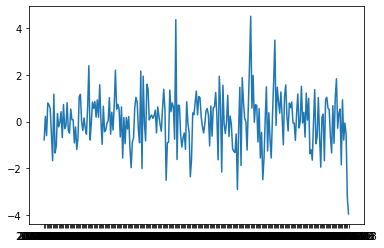

In [3]:
import csv 

ADJ_CLOSE = 5 #Constant used for readability 
DATE = 0 #Date is in Column 1, index 0 

daily_return_percentage = [] # list to store calculations 
dates = [] #will parallel the daily_return_percentage

with open ('stocks.csv', 'r') as f : 
    reader = csv.reader(f, delimiter = ',')
    fields =next(reader,None) #get the headers 

    yesterdays_price = float(next(reader, None)[ADJ_CLOSE])
    for row in reader:
      todays_price= float(row[ADJ_CLOSE])
      daily_return = ((todays_price - yesterdays_price)/ yesterdays_price) * 100
      daily_return_percentage.append(daily_return)
      dates.append(row[DATE])
      yesterdays_price = todays_price

#plot the results
from matplotlib import pyplot as plt 
plt.plot(dates, daily_return_percentage)



## Module: Pandas

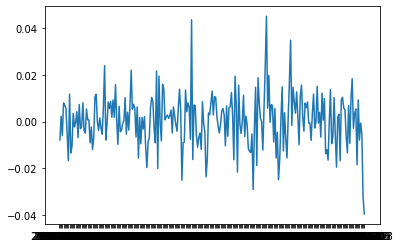

In [4]:
import pandas as pd 
from matplotlib import pyplot as plt 

#load the data 
data = pd.read_csv('stocks.csv')

#calculate the return 
data ['Daily_return'] = data['Adj Close']/data['Adj Close'].shift(1)-1

#Plot the results
plt.plot(data['Date'], data['Daily_return'] ) 
